# Wasserstein Distance

The Wasserstein Distance, often called the Earth Mover's Distance (EMD), is a metric used to quantify the "cost" of transforming one probability distribution into another. Imagine you have two piles of sand (representing two distributions) of equal total volume. The Wasserstein Distance is the minimum amount of "work" required to move the first pile of sand to perfectly match the shape and location of the second pile. The "work" is calculated as the amount of sand moved multiplied by the distance it's moved.

This makes it particularly useful for:

Ordered categories or continuous data: When your data points have a natural order or numerical value (e.g., age groups, income brackets, time spent).
Non-overlapping distributions: Unlike KL or JSD, Wasserstein distance provides a meaningful value even if the distributions don't share any common support.
Sensitivity to shifts: It's sensitive to subtle shifts in probability mass, providing a more intuitive measure of how much one distribution needs to be "moved" to become the other.

Example: Comparing Student Performance Distributions

Let's say a school introduces a new teaching method. They want to compare the distribution of student grades (on a scale of 1-5, where 1 is lowest and 5 is highest) between students who followed the old method and those who followed the new method.

We'll define the categories as numerical values for clarity:

* Grade 1
* Grade 2
* Grade 3
* Grade 4
* Grade 5

Old Teaching Method (Distribution P):

* Grade 1: 10% (0.1)
* Grade 2: 20% (0.2)
* Grade 3: 40% (0.4)
* Grade 4: 20% (0.2)
* Grade 5: 10% (0.1)

New Teaching Method (Distribution Q):

* Grade 1: 5% (0.05)
* Grade 2: 15% (0.15)
* Grade 3: 30% (0.3)
* Grade 4: 35% (0.35)
* Grade 5: 15% (0.15)

To calculate the Wasserstein Distance, we need to think about how much "probability mass" (students) needs to be moved from one grade bin to another, and by how many "steps" (distance between grades).

Conceptual Calculation Steps:

Cumulative Distributions: It's often easiest to think about this in terms of cumulative distributions.

P (Cumulative):

* Grade 1: 0.1
* Grade 2: 0.1 + 0.2 = 0.3
* Grade 3: 0.3 + 0.4 = 0.7
* Grade 4: 0.7 + 0.2 = 0.9
* Grade 5: 0.9 + 0.1 = 1.0

Q (Cumulative):

* Grade 1: 0.05
* Grade 2: 0.05 + 0.15 = 0.2
* Grade 3: 0.2 + 0.3 = 0.5
* Grade 4: 0.5 + 0.35 = 0.85
* Grade 5: 0.85 + 0.15 = 1.0

Calculate the absolute difference between cumulative distributions at each point:

* Grade 1: ∣0.1−0.05∣=0.05
* Grade 2: ∣0.3−0.2∣=0.1
* Grade 3: ∣0.7−0.5∣=0.2
* Grade 4: ∣0.9−0.85∣=0.05

Sum these differences: The Wasserstein Distance is the sum of these absolute differences.

Wasserstein Distance = 0.05+0.1+0.2+0.05=0.4

Interpretation:

* A Wasserstein Distance of 0.4 tells us that, on average, the "probability mass" (students) in the "Old Teaching Method" distribution would need to be shifted by 0.4 grade steps to match the "New Teaching Method" distribution.
  * A value of 0 would mean the distributions are identical.
  * A higher value means a greater "effort" or "distance" is required to transform one into the other.
  
In this example, the positive distance implies that the new teaching method has generally shifted student performance towards higher grades. The distance of 0.4 quantifies the average magnitude of this shift in a way that respects the ordering of the grade categories. This is a more intuitive result than what KL or JSD might give, especially if, for instance, the old method had no students in Grade 5 and the new method had some – KL/JSD would heavily penalize the zero probability, whereas Wasserstein would smoothly measure the shift from Grade 4 to Grade 5.

# Notebook Structure

1. Import necessary libraries
2. Calculate Wasserstein Distance between different distribution

# Scenario

Usecase Example: Comparing the Distribution of "Page Load Times" in an A/B Test

In an A/B test for a website feature, instead of just comparing average page load times, we might be interested in whether the distribution of load times changes. For instance, does a new script make more users experience slightly longer load times, even if the average is stable?

We'll categorize page load times into ordered bins:

* Very Fast (e.g., 0-1 second)
* Fast (e.g., 1-2 seconds)
* Moderate (e.g., 2-3 seconds)
* Slow (e.g., 3-4 seconds)
* Very Slow (e.g., 4+ seconds)

We need to define the "distance" between these bins. Since they are ordered categories, the distance between "Very Fast" and "Fast" is 1 unit, "Very Fast" and "Moderate" is 2 units, and so on.

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calculate Wasserstein Distance  between different distribution

### A. Simulate A/B Test Data for "Page Load Times

In [2]:
# --- Simulate A/B Test Data for "Page Load Times" ---

# Define ordered categories (bins) for page load time
# These implicitly define the "position" for Earth Mover's Distance
load_time_bins = ["Very Fast", "Fast", "Moderate", "Slow", "Very Slow"]
# For wasserstein_distance, we need to pass a list of positions
# We can represent positions as 0, 1, 2, 3, 4 for the bins
positions = np.arange(len(load_time_bins))

# Simulate counts for Control Group (P - reference)
# Control might have a higher proportion of very fast/fast loads
control_counts = np.array([3000, 4000, 2000, 700, 300]) # Example counts for 10000 users
control_total = control_counts.sum()
p_dist = control_counts / control_total # Convert to probability distribution

# Simulate counts for Treatment Group (Q - comparison)
# New feature might slightly shift some users to slower categories
treatment_counts = np.array([2500, 3500, 2500, 1000, 500]) # Example counts for 10000 users
treatment_total = treatment_counts.sum()
q_dist = treatment_counts / treatment_total # Convert to probability distribution

print("--- A/B Test for 'Page Load Times' ---")
print(f"Load Time Categories: {load_time_bins}\n")

print(f"Control Group (P) Counts: {control_counts}")
print(f"Control Group (P) Distribution: {p_dist}\n")

print(f"Treatment Group (Q) Counts: {treatment_counts}")
print(f"Treatment Group (Q) Distribution: {q_dist}\n")

--- A/B Test for 'Page Load Times' ---
Load Time Categories: ['Very Fast', 'Fast', 'Moderate', 'Slow', 'Very Slow']

Control Group (P) Counts: [3000 4000 2000  700  300]
Control Group (P) Distribution: [0.3  0.4  0.2  0.07 0.03]

Treatment Group (Q) Counts: [2500 3500 2500 1000  500]
Treatment Group (Q) Distribution: [0.25 0.35 0.25 0.1  0.05]



### B. Calculate and Print the Wasserstein Distance

In [3]:
# --- Calculate Wasserstein Distance ---
# The 'u_values' and 'v_values' represent the positions (e.g., 0, 1, 2...)
# The 'u_weights' and 'v_weights' represent the probabilities at those positions

w_distance = wasserstein_distance(positions, positions, p_dist, q_dist)

print(f"Wasserstein Distance: {w_distance:.5f}")

# --- Interpretation ---
print("\n--- Interpretation ---")
print("The Wasserstein Distance (Earth Mover's Distance) quantifies the minimum 'effort' (cost) to transform one distribution into another.")
print("A value of 0 means the distributions are identical.")
print("A higher value means more 'work' is needed to transform one distribution into the other, implying greater dissimilarity.")
print(f"In this example, a Wasserstein Distance of {w_distance:.5f} indicates a small but discernible shift in the distribution of page load times.")
print("Since the categories are ordered, this distance tells us how much 'mass' (proportion of users) had to be shifted, and 'how far', on average, along the load time scale.")
print("For instance, a positive distance here implies that, on average, the Treatment group's load times are slightly 'slower' than the Control's, as some proportion of users shifted from 'Very Fast' and 'Fast' to 'Moderate', 'Slow', or 'Very Slow' categories.")

Wasserstein Distance: 0.22000

--- Interpretation ---
The Wasserstein Distance (Earth Mover's Distance) quantifies the minimum 'effort' (cost) to transform one distribution into another.
A value of 0 means the distributions are identical.
A higher value means more 'work' is needed to transform one distribution into the other, implying greater dissimilarity.
In this example, a Wasserstein Distance of 0.22000 indicates a small but discernible shift in the distribution of page load times.
Since the categories are ordered, this distance tells us how much 'mass' (proportion of users) had to be shifted, and 'how far', on average, along the load time scale.
For instance, a positive distance here implies that, on average, the Treatment group's load times are slightly 'slower' than the Control's, as some proportion of users shifted from 'Very Fast' and 'Fast' to 'Moderate', 'Slow', or 'Very Slow' categories.


# Interpretation

* Non-Zero Difference: The value is 0.22, which is greater than 0. This immediately tells you that the distribution of page load times for the Treatment group is not identical to that of the Control group. There's a measurable difference in how users experience load times between the old and new website designs.
* Magnitude of "Shift":
   * The Wasserstein Distance quantifies the minimum "cost" to transform one distribution into the other. In our example, since the categories were implicitly represented as positions (0, 1, 2, 3, 4 for Very Fast, Fast, Moderate, Slow, Very Slow), a distance of 0.22 means that, on average, 0.22 "units" of probability mass (or 0.22 "bins" of load time) had to be shifted to transform the Control group's load time distribution into the Treatment group's distribution.
   * A higher Wasserstein distance would indicate a greater overall shift in the load time distribution. For instance, a distance of 1.0 would mean, on average, a shift of one full category (e.g., from "Very Fast" to "Fast").
   * A distance of 0.22 is a relatively small, but noticeable, shift. It suggests that the new feature might be subtly pushing some users into slightly slower load time categories.

* Direction of Shift (requires looking at the actual distributions):
    * While the number 0.22 tells you how much shift there is, it doesn't directly tell you in which direction. However, given the context of the example (where we simulated the treatment group having slightly more users in slower categories), this positive distance implies that the Treatment group's page load times are, on average, slightly slower than the Control group's. You would confirm this by looking at the proportions in each bin (e.g., if "Very Fast" decreased and "Moderate" increased).
    
In essence, a Wasserstein Distance of 0.22 for page load times in an A/B test indicates that the new website feature has introduced a small, quantifiable, and average increase in the time it takes for pages to load for users, shifting some proportion of users into slightly slower loading categories. This metric is valuable because it respects the ordered nature of the load time categories and provides a continuous measure of this shift.

### C. Visualization of the distribution

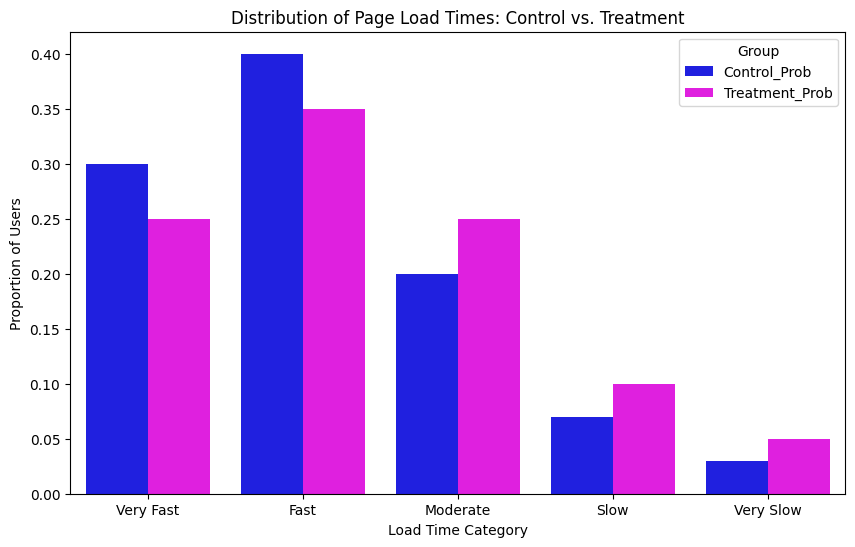


--- Visual Confirmation ---
The bar chart visually confirms the subtle shifts in probabilities. The Wasserstein distance quantifies the 'effort' to transform the blue bars into the magenta bars across the ordered categories.


In [6]:
# --- Visualization of Distributions ---

df_dist = pd.DataFrame({
    'Category': load_time_bins,
    'Control_Prob': p_dist,
    'Treatment_Prob': q_dist
})

df_dist_melted = df_dist.melt(id_vars='Category', var_name='Group', value_name='Probability')

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Probability', hue='Group', data=df_dist_melted, palette={'Control_Prob': 'blue', 'Treatment_Prob': 'magenta'})
plt.title('Distribution of Page Load Times: Control vs. Treatment')
plt.xlabel('Load Time Category')
plt.ylabel('Proportion of Users')
plt.show()

print("\n--- Visual Confirmation ---")
print("The bar chart visually confirms the subtle shifts in probabilities. The Wasserstein distance quantifies the 'effort' to transform the blue bars into the magenta bars across the ordered categories.")

# Detailed interpretation:

Purpose of the Graph: The graph is designed to illustrate how a new website feature or design (Treatment Group) influences the distribution of page load times experienced by users, in comparison to the existing design (Control Group). It serves as a visual aid for an A/B test related to website performance.

Categories of Page Load Times: The x-axis divides the page load times into five ordered categories:

* "Very Fast"
* "Fast"
* "Moderate"
* "Slow"
* "Very Slow"

Proportion of Users (Y-axis): The y-axis represents the proportion of users falling into each of these load time categories. This allows for a direct comparison of the shape of the load time distribution between the two groups.

Comparison Between Control and Treatment Groups:

* "Very Fast" category: The Control Group (blue bar) shows a higher proportion of users (around 0.30 or 30%) experiencing very fast page loads compared to the Treatment Group (magenta bar), which is around 0.25 or 25%.
* "Fast" category: The Control Group (blue bar) again has a higher proportion of users (around 0.40 or 40%) in this category compared to the Treatment Group (magenta bar), which is approximately 0.35 or 35%.
* "Moderate" category: Here, the trend reverses. The Treatment Group (magenta bar) has a noticeably higher proportion of users (around 0.25 or 25%) experiencing moderate load times, whereas the Control Group (blue bar) is lower, at approximately 0.20 or 20%.
* "Slow" category: This category also shows a higher proportion for the Treatment Group (magenta bar), around 0.10 or 10%, compared to the Control Group (blue bar), which is roughly 0.07 or 7%.
* "Very Slow" category: The Treatment Group (magenta bar) continues to have a higher proportion of users (around 0.05 or 5%) experiencing very slow load times, compared to the Control Group (blue bar), which is quite low, around 0.03 or 3%.

Overall Trend/Impact of Treatment:

* The graph clearly indicates a shift in the distribution of page load times due to the new website feature.
* The Control Group shows a higher concentration of users in the faster load time categories ("Very Fast" and "Fast").
* The Treatment Group shows a shift of users towards the slower load time categories ("Moderate," "Slow," and "Very Slow").
* This suggests that the new feature, while potentially offering other benefits, appears to have a negative impact on page load performance, causing a larger proportion of users to experience longer load times.

Connection to Wasserstein Distance: This visual interpretation aligns with the positive Wasserstein Distance calculated earlier (0.22000). The Wasserstein Distance quantifies the "effort" needed to transform the Control distribution (more users in faster bins) into the Treatment distribution (more users in slower bins), respecting the inherent ordering of the load time categories. The visual shift of mass from left (faster) to right (slower) on the graph is what the Wasserstein Distance measures.

# Completed